# Practica con métodos de agrupamiento basados en densidad y en probabilidad con este notebook en Python
En este *notebook* aprenderás a ejecutar un método de agrupamiento basado en densidad (DBSCAN) y otro basado en probabilidad (GMM/Expectation-Maximization) utilizando las librerías *PyClustering* y *scikit-learn*. Veremos cómo configurar sus parámetros y visualizar sus resultados.

## 1. Ejecutar el algoritmo DBSCAN en ***PyClustering***
En la primera parte del *notebook* utilizaremos la librería *PyClustering*. En concreto, nos centraremos en el paquete [*cluster.dbscan*](https://pyclustering.github.io/docs/0.8.2/html/d2/d42/classpyclustering_1_1cluster_1_1dbscan_1_1dbscan.html), donde se encuentra la implementación del método DBSCAN. Como en notebooks anteriores, primero tenemos que importar los paquetes que necesitaremos:

In [1]:
# La primera vez que se vaya a ejecutar este notebook es necesario instalar la librería pyclustering
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer
import numpy as np
import matplotlib.pyplot as plt

Vamos a utilizar el *dataset* Iris para este ejemplo, ya que viene incorporado en la librería. De sus cuatro propiedades numéricas, nos quedaremos con las dos primeras a las que llamaremos *x* e *y*. Representamos esta muestra bi-dimensional con *matplotlib* para ver la distribución de los datos.

[5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0, 5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6, 5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0, 5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]
[3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.1, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3

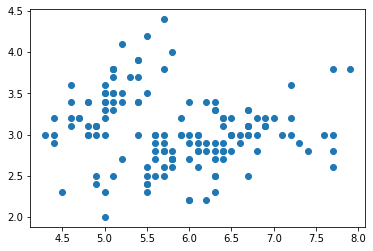

In [2]:
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
datos = read_sample(FAMOUS_SAMPLES.SAMPLE_IRIS)
x = [punto[0] for punto in datos]
y = [punto[1] for punto in datos]
datos_xy = np.column_stack((x, y))
print(x)
print(y)
plt.scatter(x, y)
plt.show()

A continuación, podemos configurar los parámetros del algoritmo DBSCAN. Tenemos que especificar el valor de *eps* (radio de vecindad) y el de *neighbors* (número mínimo de vecinos).

In [3]:
eps = 0.25
neighbors = 5
alg_dbscan = dbscan(datos_xy, eps, neighbors);

Para ejecutar el análisis de grupos, invocamos a la función *process* como hacíamos con otros métodos de esta misma librería.

In [4]:
alg_dbscan.process()

Una vez ejecutado el algoritmo, podemos obtener los grupos por medio del método *get_clusters*. En este caso, no sabemos de antemano cuántos grupos se han obtenido, pero podemos averiguarlo con el método *len*.

In [5]:
# Devuelve un array de k elementos, donde cada elemento continene el índice de las instancias asignadas al grupo k
grupos = alg_dbscan.get_clusters()
print(grupos)
num_grupos = len(grupos)
print(num_grupos)

[[0, 21, 27, 17, 23, 28, 4, 43, 26, 40, 7, 49, 39, 46, 19, 44, 48, 31, 20, 35, 24, 11, 37, 34, 9, 16, 5, 10, 30, 1, 25, 6, 2, 29, 12, 45, 47, 3, 22, 42, 38], [50, 125, 52, 141, 139, 143, 120, 102, 86, 145, 112, 77, 140, 65, 124, 144, 129, 107, 75, 147, 104, 116, 110, 58, 76, 137, 54, 74, 51, 115, 103, 128, 132, 56, 100, 133, 123, 111, 97, 126, 136, 127, 91, 63, 71, 73, 148, 146, 134, 72, 138, 78, 83, 149, 61, 87, 70, 114, 82, 101, 67, 142, 92, 95, 96, 64, 99, 121, 94, 79, 55, 113, 69, 88, 66, 84, 90, 89, 80, 81, 53]]
2


Además, el algoritmo DBSCAN aisla los puntos considerados como "ruido" o "outliers". Para obtenerlos, utilizamos el método *get_noise*.

In [6]:
ruido = alg_dbscan.get_noise()
print(ruido)
num_outliers = len(ruido)
print(num_outliers)

[8, 13, 14, 15, 18, 32, 33, 36, 41, 57, 59, 60, 62, 68, 85, 93, 98, 105, 106, 108, 109, 117, 118, 119, 122, 130, 131, 135]
28


Podemos visualizar la asignación en una gráfica bidimensional utilizando la clase *visualizer*.

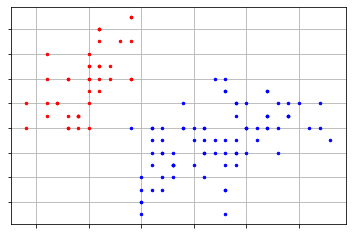

In [7]:
grafico = cluster_visualizer();
grafico.append_clusters(grupos, datos_xy)
grafico.show();

## 2. Ejecutar el algoritmo Expectation-Maximization en ***PyClustering***
Vamos ahora a trabjar con el agrupamiento basado en probabilidad que nos ofrece *PyClustering*. Se trata del modelo de mezcla de distribuciones gaussianas con el algoritmo *Expectation-Maximization*. Este algoritmo está en el paquete [*cluster.ema*](https://pyclustering.github.io/docs/0.8.2/html/d1/d24/namespacepyclustering_1_1cluster_1_1ema.html)

In [8]:
from pyclustering.cluster.ema import ema, ema_initializer, ema_observer, ema_visualizer, ema_init_type

Según su [documentación](https://pyclustering.github.io/docs/0.8.2/html/d4/d22/classpyclustering_1_1cluster_1_1ema_1_1ema__init__type.html), podemos seleccionar el tipo de inicialización entre aleatoria o basada en *k-means++*. En este caso, vamos a utilizar la forma de inicialización no aleatoria, por lo que primero necesitamos estimar los valores iniciales de medias y la matriz de covarianzas. 

In [9]:
num_grupos = 3
medias_inicial, covarianzas_inicial = ema_initializer(datos_xy, num_grupos).initialize(ema_init_type.KMEANS_INITIALIZATION)
print(medias_inicial)
print(covarianzas_inicial)

[[5.773584905660377, 2.692452830188679], [6.812765957446806, 3.0744680851063824], [5.005999999999999, 3.4180000000000006]]
[array([[0.13775036, 0.0296045 ],
       [0.0296045 , 0.07955733]]), array([[0.20505088, 0.01446346],
       [0.01446346, 0.06933395]]), array([[0.12424898, 0.10029796],
       [0.10029796, 0.14517959]])]


A continuación, podemos configurar el método con la inicialización obtenida y ejecutar el análisis de grupos. En la primera línea, estamos creando un objeto de tipo *observer* que nos va a permitir ver cómo varía el proceso de agrupamiento.

In [10]:
alg_ema = ema(datos_xy, num_grupos, medias_inicial, covarianzas_inicial);
alg_ema.process()

Tras ejecutarlo, podemos extraer no solo los grupos, sino también las medias y covarianzas finales.



In [11]:
grupos = alg_ema.get_clusters()
print(grupos)
medias_final = alg_ema.get_centers()
print(medias_final)
covarianzas_final = alg_ema.get_covariances()
print(covarianzas_final)

[[41, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]]
[array([6.22942744, 2.8697785 ]), array([5.01676098, 3.44839193])]
[array([[0.47496975, 0.12424048],
       [0.12424048, 0.11160419]]), array([[0.12010866, 0.08977037],
       [0.08977037, 0.11942809]])]


Por último, vamos a visualizar de forma dinámica cómo se han ido definiendo las distribuciones de probabilidad alrededor de los datos.

/var/folders/0n/nxywfqj174j8jrc5w4btcbb40000gn/T/ipykernel_6058/3507941121.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  grafico.show()


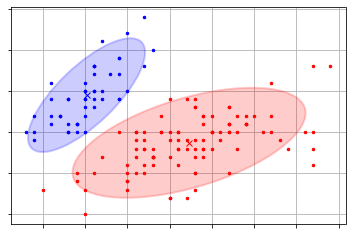

In [12]:
grafico = ema_visualizer.show_clusters(grupos, datos_xy, covarianzas_final, medias_final, display=False)
grafico.show()

## 3. Ejecutar el algoritmo DBSCAN en ***scikit-learn***
Vamos a utilizar el mismo conjunto de datos (Iris) pero ahora utilizaremos la implementación disponible en [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Para ello, primero importamos el algoritmo.

In [13]:
from sklearn.cluster import DBSCAN

Vamos a utilizar la misma muestra de datos (datos_xy) y los mismos parámetros que en la ejecución con *PyClustering*.

In [14]:
alg_dbscan_sklearn = DBSCAN(eps=0.25, min_samples=5)
alg_dbscan_sklearn.fit(datos_xy)

DBSCAN(eps=0.25)

Como DBSCAN asigna -1 a los datos etiquetados como ruido, debemos procesar por separado estos puntos. Por ejemplo, para conocer el número de grupos identificado podemos utilizar la siguiente línea de código:

In [15]:
etiquetas_dbscan = alg_dbscan_sklearn.labels_
print(etiquetas_dbscan)
num_grupos = len(set(etiquetas_dbscan)) - (1 if -1 in etiquetas_dbscan else 0)
print(num_grupos)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  2 -1  1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1 -1  2  1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1
  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
3


Para conocer el número de puntos etiquetados como ruido, simplemente tenemos que contar el número de veces que aparece la etiqueta -1:

In [16]:
num_outliers = list(etiquetas_dbscan).count(-1)
print(num_outliers)

19


## 4. Ejecutar el algoritmo Expectation-Maximization en ***scikit-learn***
En *scikit-learn* también podemos aplicar el método EM asociado al modelo de mezclas gaussianas. Puedes encontrar su documentación en el paquete [sklearn.mixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture):

In [17]:
from sklearn.mixture import GaussianMixture

En su configuración, podemos indicar el número de componentes gaussianas a estimar y la semilla para la inicialización aleatoria.

In [18]:
alg_gmm_sklearn = GaussianMixture(n_components=3, random_state=0, init_params='random')
alg_gmm_sklearn.fit(datos_xy)

GaussianMixture(init_params='random', n_components=3, random_state=0)

Para evitar los inconvenientes de la inicialización aleatoria, podemos aplicar alguna de estas dos opciones:


1.   Generar más de una inicialización aleatoria, quedándonos con la mejor. Para ello, se debe utilizar el parámetro *n_init*.
2.   Utilizar el método k-means para inicializar, que de hecho es el valor por defecto del parámetro *init_params*.



In [19]:
alg_gmm_sklearn = GaussianMixture(n_components=3, random_state=0, init_params='kmeans')
alg_gmm_sklearn.fit(datos_xy)

GaussianMixture(n_components=3, random_state=0)

Una vez ejecutado el método, podemos acceder a sus propiedades: pesos de cada componente del *mixture model*, medias, y covarianzas

In [20]:
pesos = alg_gmm_sklearn.weights_
print(pesos)
medias = alg_gmm_sklearn.means_
print(medias)
covarianzas = alg_gmm_sklearn.covariances_
print(covarianzas)

[0.32483115 0.28816701 0.38700184]
[[5.01494511 3.44040237]
 [6.69225795 3.03018616]
 [5.90652226 2.74740414]]
[[[0.11948421 0.08969613]
  [0.08969613 0.12149899]]

 [[0.3588512  0.05091598]
  [0.05091598 0.08956947]]

 [[0.27590209 0.08910477]
  [0.08910477 0.09414053]]]


Como es habitual en *sklearn*, podemos usar el método *predict* para predecir a qué grupo se asignaría una nueva muestra.

In [21]:
nuevo_dato = [[7,3.5]]
prediccion = alg_gmm_sklearn.predict(nuevo_dato)
print(prediccion)

[1]
